# The GLM: A Worked Example

## Dataset
To see how we use the GLM, we will work through a simple non-imaging example before turning to applying the GLM to fMRI data in the next section. In this example we're again looking at the miles per gallon (MPG) of a selection of cars. To keep this example contained, we have limited our sample to only 6 cars. The data set is shown below

| MPG  | Horsepower | Weight | Transmission |
| ---- | ---------- | ------ | ------------ |
| 21.0 | 110        | 2.620  | Manual       |
| 21.0 | 110        | 2.875  | Manual       |
| 22.8 | 93         | 2.320  | Manual       |
| 21.4 | 110        | 3.215  | Automatic    |
| 18.7 | 175        | 3.440  | Automatic    |
| 18.1 | 105        | 3.460  | Automatic    |

In this example, `MPG` is the outcome variable and so forms the vector $\mathbf{Y}$

In [1]:
Y = [21.0 21.0 22.8 21.4 18.7 18.1]'

Y = 6x1 double
   21.0000
   21.0000
   22.8000
   21.4000
   18.7000
   18.1000

## Building the Design Matrix
In terms of our design matrix we need a column of 1s for the constant, followed by `horsepower`, `weight` and then a dummy variable for `transmission`.

In [2]:
X = [1     1     1     1     1     1;     ...
     110   110   93    110   175   105;   ...
     2.620 2.875 2.320 3.215 3.440 3.460; ...
     1     1     1     0     0     0]'

X = 6x4 double
    1.0000  110.0000    2.6200    1.0000
    1.0000  110.0000    2.8750    1.0000
    1.0000   93.0000    2.3200    1.0000
    1.0000  110.0000    3.2150         0
    1.0000  175.0000    3.4400         0
    1.0000  105.0000    3.4600         0

Taking both the outcome and design matrix together, our GLM currently has the form

$$
\begin{bmatrix}
21.0 \\ 
21.0 \\
22.8 \\
21.4 \\
18.7 \\
18.1
\end{bmatrix}
=
\begin{bmatrix}
1 & 110 & 2.620 & 1 \\
1 & 110 & 2.875 & 1 \\
1 & 93  & 2.320 & 1 \\
1 & 110 & 3.215 & 0 \\
1 & 175 & 3.440 & 0 \\
1 & 105 & 3.460 & 0
\end{bmatrix}
\begin{bmatrix}
\beta_{0} \\
\beta_{1} \\
\beta_{2} \\
\beta_{3}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{1} \\ 
\epsilon_{2} \\
\epsilon_{3} \\
\epsilon_{4} \\
\epsilon_{5} \\
\epsilon_{6}
\end{bmatrix}
$$

So, we have our *outcome* in $\mathbf{Y}$ and our *predictors* arranged in $\mathbf{X}$, but we do not know the values of the *parameters* in $\boldsymbol{\beta}$ or the *errors* in $\boldsymbol{\epsilon}$.

## Parameter Estimation
We can estimate the parameters using the equation given in the previous section, derived from the method of maximum likelihood

In [3]:
beta = inv(X'*X)*X'*Y

beta = 4x1 double
   36.7003
   -0.0048
   -4.9448
   -1.7150

These are the most likely values for the parameters in the population, based on the current data. Once we have the parameter estimates we can calculate the predicted values of $\mathbf{Y}$, denoted $\hat{\mathbf{Y}}$

In [4]:
Yhat = X*beta

Yhat = 6x1 double
   21.4985
   20.2375
   23.0640
   20.2713
   18.8447
   19.0840

These values represent the points on the regression plane for each combination of predictor values. For instance, focussing on the first estimate, the model predicts that any car with 110 horsepower that weighs 2,620 lbs and has a manual transmission will achieve 21.4985 MPG. These estimates can then be used calculate the errors

In [5]:
E = Y - Yhat

E = 6x1 double
   -0.4985
    0.7625
   -0.2640
    1.1287
   -0.1447
   -0.9840

which represent the degree to which each of the model predictions diverge from the original data. We now have all the elements needed to complete the GLM equation

$$
\begin{bmatrix}
21.0 \\ 
21.0 \\
22.8 \\
21.4 \\
18.7 \\
18.1
\end{bmatrix}
=
\begin{bmatrix}
1 & 110 & 2.620 & 1 \\
1 & 110 & 2.875 & 1 \\
1 & 93  & 2.320 & 1 \\
1 & 110 & 3.215 & 0 \\
1 & 175 & 3.440 & 0 \\
1 & 105 & 3.460 & 0
\end{bmatrix}
\begin{bmatrix}
36.700 \\
-0.005 \\
-4.945 \\
-1.715
\end{bmatrix}
+
\begin{bmatrix}
-0.499 \\
\hphantom{-}0.763 \\
-0.264 \\
\hphantom{-}1.129 \\
-0.145 \\
-0.984
\end{bmatrix}
$$

## Interpreting the Parameters

In terms of interpreting the parameters, it is helpful to first put them in a table

| Effect       | Estimate | 
| ------------ | -------- |
| Constant     | 36.700   |
| Horsepower   | -0.005   |
| Weight       | -4.945   |
| Transmission | -1.715   |

The interpretation is then that 
- An increase in `horsepower` of 1 leads to a decrease in `MPG` of 0.005 miles
- An increase in `weight` of 1000lbs leads to a decrease in `MPG` of 4.946 miles 
- The average difference between automatic and manual transmission cars is a reduction in `MPG` of 1.715 miles

While at first it seems that `weight` has the most effect on `MPG`, it is notable that these raw estimates are difficult to interpret due to their differing units (e.g. 1 horsepower vs 1000lbs), and the fact that we have not taken the uncertainty of the estimates into account. To do so, we can calculate the standard errors using the estimate of the model variance

In [6]:
n      = size(X,1);
p      = size(X,2);
sigma2 = (E'*E) / (n-p)

sigma2 = 1.5813

which can then be used to construct the variance-covariance matrix of the parameter estimates and extract the standard errors

In [7]:
covBeta = sigma2 * inv(X'*X);
SE      = sqrt(diag(covBeta))

SE = 4x1 double
    9.7385
    0.0236
    3.0750
    2.4422

We can then add these estimates to the table from above

| Effect       | Estimate | SE     |
| ------------ | -------- | ------ |
| Constant     | 36.700   | 9.739  |
| Horsepower   | -0.005   | 0.024  |
| Weight       | -4.945   | 3.075  |
| Transmission | -1.715   | 2.442  |

providing both our estimates of the parameter values and their uncertainty.

## Inference
As indicated in the previous section, to make decisions about the estimates we would typically divide each estimate by each standard error to form a *t*-statistic

In [8]:
t = beta ./ SE

t = 4x1 double
    3.7686
   -0.2045
   -1.6081
   -0.7022

which we can then use to calculate *p*-values by querying the null *t*-distribution with $n-p$ degrees of freedom

In [9]:
pvals = 1 - tcdf(abs(t),n-p); % one-tailed tests
pvals = pvals .* 2            % two-tailed tests

pvals = 4x1 double
    0.0638
    0.8569
    0.2491
    0.5553

Which can add to our table to complete all the information we need for this analysis

| Effect       | Estimate | SE     | *t*    | *p*   |
| ------------ | -------- | ------ | ------ | ----- |
| Constant     | 36.700   | 9.739  | 3.769  | 0.064 |
| Horsepower   | -0.005   | 0.024  | -0.205 | 0.857 |
| Weight       | -4.945   | 3.075  | -1.608 | 0.249 |
| Transmission | -1.715   | 2.442  | -0.702 | 0.555 |

Based on this information, we would conclude that none of the parameters were significantly different from zero. So although it appeared as if `weight` would be the most relevant predictor of `MPG`, according to this analysis there is not enough evidence to discount the posibility of *no* relationsip with `MPG` across all the predictor variables. Remember, that this conclusion is largely governed by the degree of *uncertainty* in the parameter estimates, due to the small sample. It is likely that with more data that the standard errors would decrease and a clearer picture of the relationship between these variables and `MPG` would emerge.

## Using `fitlm`
We can confirm the manual calculations given above by using the `fitlm` function from the MATLAB [Statistics and Machine Learning](https://uk.mathworks.com/products/statistics.html) toolbox. We pass the predictor variables as the first argument (missing out the constant) and the outcome variable as the second argument. As we can see, this function returns a table of values identical to those given above.

In [3]:
Model = fitlm(X(:,2:4),Y)

Model = 
Linear regression model:
    y ~ 1 + x1 + x2 + x3

Estimated Coefficients:
                    <strong>Estimate</strong>        <strong>SE</strong>        <strong>tStat</strong>       <strong>pValue</strong> 
                   <strong>__________</strong>    <strong>________</strong>    <strong>________</strong>    <strong>________</strong>

    <strong>(Intercept)</strong>          36.7      9.7385      3.7686    0.063752
    <strong>x1         </strong>    -0.0048303    0.023622    -0.20448      0.8569
    <strong>x2         </strong>       -4.9448       3.075     -1.6081     0.24908
    <strong>x3         </strong>        -1.715      2.4422    -0.70224     0.55526


Number of observations: 6, Error degrees of freedom: 2
Root Mean Squared Error: 1.26
R-squared: 0.797,  Adjusted R-Squared: 0.493
F-statistic vs. constant model: 2.62, p-value = 0.288

We can use the returned `Model` object to create *added variable* plots to visualise the edges of the regression plane, defined by the parameter estimates.

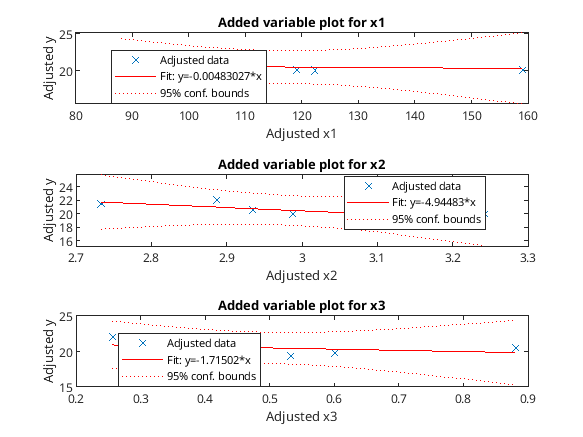

In [5]:
tiledlayout(3,1);
nexttile;
plotAdded(Model,2);
nexttile;
plotAdded(Model,3);
nexttile;
plotAdded(Model,4);

Noting that `transmission` no longer appears as a dummy variable because it has been *adjusted* for the presence of the other variables in the model. In all cases, the very wide confidence bands are a result of large uncertainty in the parameter estimates, due to the small sample size.